# Finding and drawing Corners in an Image

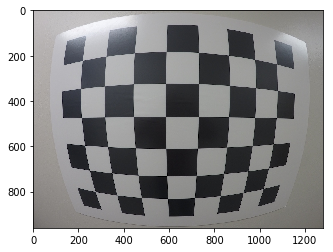

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('calibration1.jpg')
plt.imshow(img)

In [2]:
# use cv2.findChessboardCorners() and cv2.drawChessboardCorners() to find and plot the corners

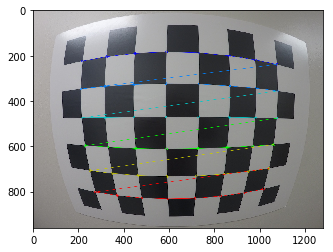

In [3]:
# we can make the plots appear separately to interact with them by uncommenting the belwo line
#%matplotlib qt

# prepare object points
nx = 8  #number of inside corners in x
ny = 6  #number of inside corners in y

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

## Now Calibrating the Camera

In [4]:
# we should use alot of chessboard images taken from differnt angles to calibrate the camera 
# Then we use the camera distortion parameters to test another image   

### First step: prepare the 3D object points

In [5]:
# let's read the image again
img = mpimg.imread('calibration1.jpg')

objpoints = [] # undistorted real image points (3D points)
imgpoints = [] # 2D image points 
# we need to map the coordinates of the imgpoints to objpoints

# The object points (objpoints) will always be the same which are the known object points of the chessboard corners
# i.e. (0,0,0) for the first corner on the top left, and (7,5,0) for the last corner in the right bottom
# the z-coordinate is zero for all the points

# Now let's prepare the points of the objpoints 

objp = np.zeros((6*8, 3), np.float32)  # this creates a 48 x 3 matrix filled with zeros
print("objp with zeros", objp)
print("objp shape", objp.shape)

# now let's fill the x and y with the coordinates we want (i.e. (0,0,0), (1,0,0),....(7,0,0), (0,1,0), (1,1,0),...)  
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
print("filled objp", objp)
print("objp.shape", objp.shape)

objp with zeros [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
objp shape (48, 3)
filled objp [[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7.

In [6]:
# Before we continue let's talk about np.mgrid and np.reshape in the code line:
#objp_test[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

print(np.mgrid[0:8,0:6].shape)
print(np.mgrid[0:8,0:6])
# then we get the matrix transpose as we are dealing with image where x is the columns
print(np.mgrid[0:8,0:6].T.shape)
print(np.mgrid[0:8,0:6].T)
# then reshape the output to a 2D array (instead of a 3D one) with 2 columns and as many rows as possible  
print(np.mgrid[0:8,0:6].T.reshape(-1,2))

(2, 8, 6)
[[[0 0 0 0 0 0]
  [1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]
  [7 7 7 7 7 7]]

 [[0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]]]
(6, 8, 2)
[[[0 0]
  [1 0]
  [2 0]
  [3 0]
  [4 0]
  [5 0]
  [6 0]
  [7 0]]

 [[0 1]
  [1 1]
  [2 1]
  [3 1]
  [4 1]
  [5 1]
  [6 1]
  [7 1]]

 [[0 2]
  [1 2]
  [2 2]
  [3 2]
  [4 2]
  [5 2]
  [6 2]
  [7 2]]

 [[0 3]
  [1 3]
  [2 3]
  [3 3]
  [4 3]
  [5 3]
  [6 3]
  [7 3]]

 [[0 4]
  [1 4]
  [2 4]
  [3 4]
  [4 4]
  [5 4]
  [6 4]
  [7 4]]

 [[0 5]
  [1 5]
  [2 5]
  [3 5]
  [4 5]
  [5 5]
  [6 5]
  [7 5]]]
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]
 [7 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [7 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [7 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]
 [5 4]
 [6 4]
 [7 4]
 [0 5]
 [1 5]
 [2 5]
 [3 5]
 [4 5]
 [5 5]
 [

### Second step: get the corners of the distorted image 

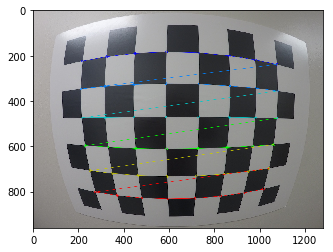

In [7]:
# convert the image to gray to easily deal with it 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")

ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
if ret == True:
    imgpoints.append(corners) # add the corners to the distorted image points
    objpoints.append(objp)    # the object points are always the same
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(img)
else:
    print("error: no corners found")

### Second step again: get the corners of multiple distorted images 

error: no corners found in photo:  calibration_wide/GOPR0055.jpg


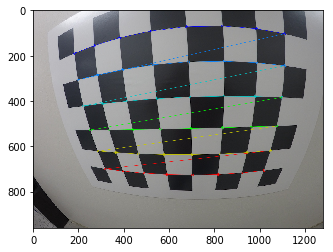

In [8]:
import glob

images = glob.glob('calibration_wide/GO*.jpg')
for fname in images:
    img = mpimg.imread(fname)
    # convert the image to gray to easily deal with it 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(gray, cmap="gray")

    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    if ret == True:
        imgpoints.append(corners) # add the corners to the distorted image points
        objpoints.append(objp)    # the object points are always the same
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow(img)
    else:
        print("error: no corners found in photo: ", fname)


### Third step: Determine the camera matrix

In [9]:
# using the objectpoints we got from all the calibration images and the object points we constructed, we now:
# get the following 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
#check the output if you want
#print("ret", ret)
#print("mtx", mtx)
#print("dist", dist)
#print("rvecs", rvecs)
#print("tvecs", tvecs)

### Fourth step: Undistort the images using the camera matrix

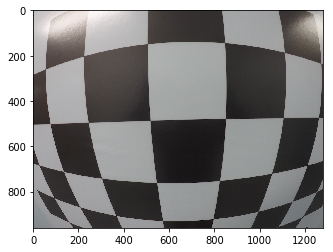

In [10]:
# Now let's read a test image and try to undistort it
img = cv2.imread('calibration_wide/test_image.jpg')
plt.imshow(img)

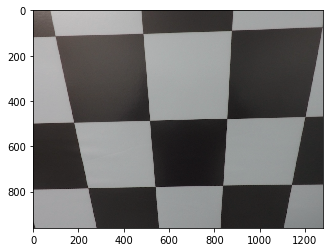

In [11]:
# now undistor this image using the parameters determined in the previous steps
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)

# Perspective Transform

In [12]:
# Now let's read another test image and try to undistort it then change the perspective to unwarp the image

### First: let's undistort the image

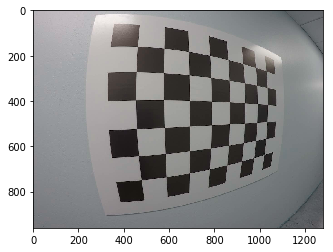

In [50]:
# Now let's read another test image and try to undistort it
img = cv2.imread('calibration_wide/test_image2.png')
plt.imshow(img)

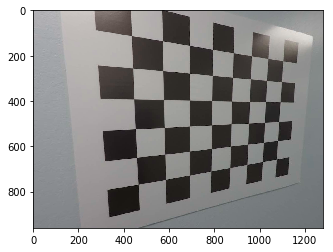

In [51]:
# now undistor this image using the parameters determined in the previous steps
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)

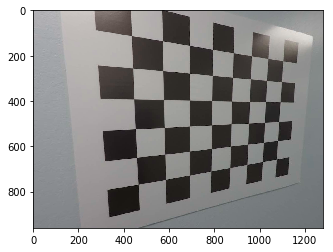

In [52]:
%matplotlib inline
plt.imshow(undist) 

### Second: Perform Perspective Transform 

In [53]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps

    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # 3) If corners found: 
     # a) draw corners
    if ret == True:
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        #print(corners)
        print(corners[0,0])
        print(corners[1,0])
        print(corners[8,0])
        print(corners[9,0])
        print(corners.shape)
        
    else:
        print("error: no corners found")
    # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
    src = np.float32([corners[0,0],corners[1,0],corners[8,0],corners[9,0]])
    print("src", src)
    
    #Note: you could pick any four of the detected corners 
     # as long as those four corners define a rectangle
     #One especially smart way to do this would be to use four well-chosen
     # corners that were automatically detected during the undistortion steps
     #We recommend using the automatic detection of corners in your code
    # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
    img_size = (gray.shape[1], gray.shape[0])
    offset = corners[1,0,0] - corners[0,0,0] 
    #offset = 100
    print(offset)
    dst = np.float32([corners[0,0], [corners[0,0,0]+offset, corners[0,0,1]], [corners[0,0,0], corners[0,0,1]+offset],[corners[0,0,0]+offset, corners[0,0,1]+offset]])
    
    print("dst", dst)
    # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines
    #M = None
    #warped = np.copy(img) 
    return warped, M

[436.459   114.33839]
[573.6019  137.91837]
[441.40845 256.58228]
[575.6196  268.48712]
(48, 1, 2)
src [[436.459   114.33839]
 [573.6019  137.91837]
 [441.40845 256.58228]
 [575.6196  268.48712]]
137.14291
dst [[436.459   114.33839]
 [573.6019  114.33839]
 [436.459   251.4813 ]
 [573.6019  251.4813 ]]


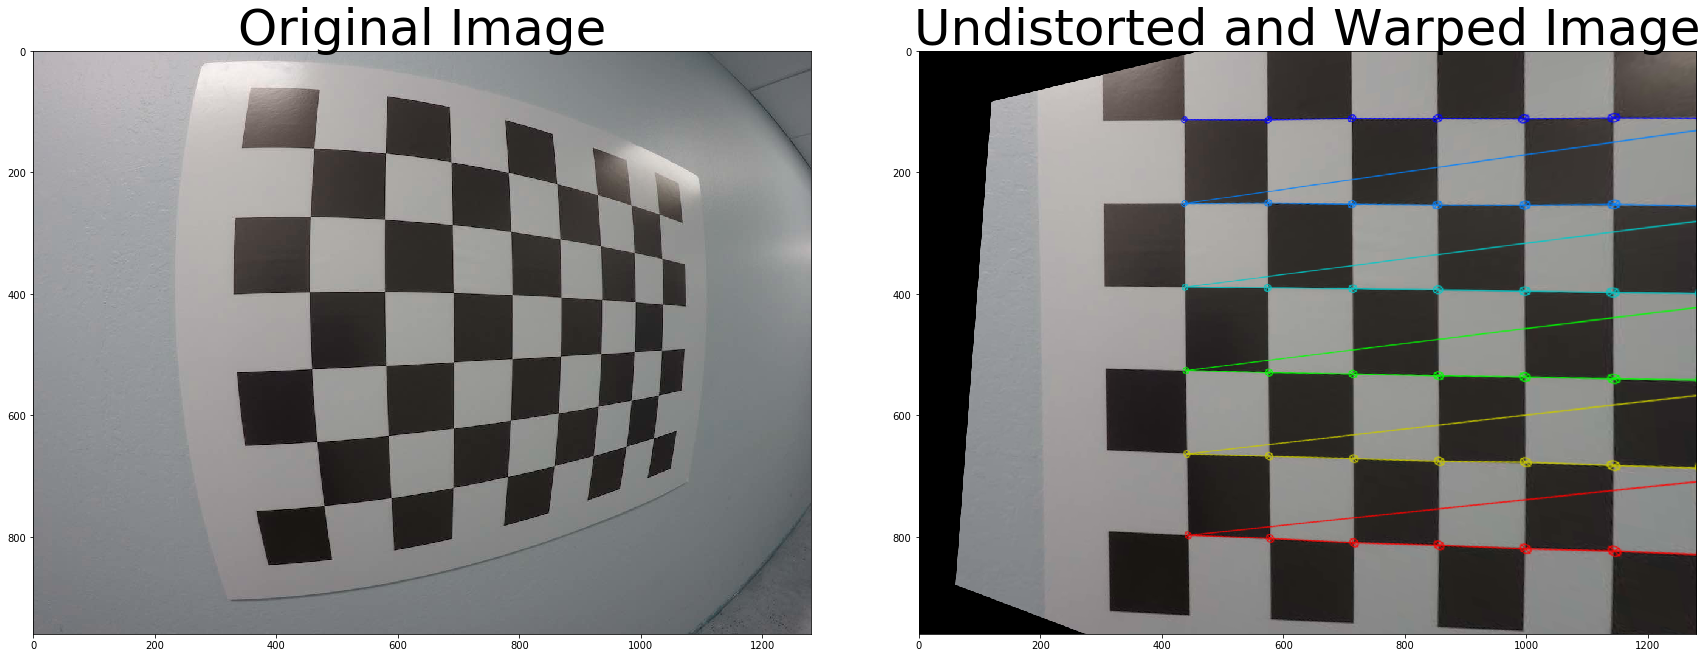

In [54]:
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

top_down, perspective_M = corners_unwarp(undist, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)